# Multiple Linear Regression
## 

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**So interpretation is important!**

### Install dependencies


In [1]:
!pip install scikit-learn
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Step 1: Reading and Understanding the Data



In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
bike_sharing_df = pd.read_csv("https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv")

In [5]:
# Check the head of the dataset
bike_sharing_df.head(10)
#bike_sharing_df[bike_sharing_df['holiday']==1]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


Inspect the various aspects of the dataset

In [6]:
bike_sharing_df.shape

(730, 16)

In [7]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.

We'll visualise our data using `matplotlib` and `seaborn`.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data Dictionary :

    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


Assumptions on data values for season and months:

#### Spring:	March – April – May

#### Summer:	June – July – August

#### Fall (Autumn):	September – October – November

#### Winter:	December – January – February

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

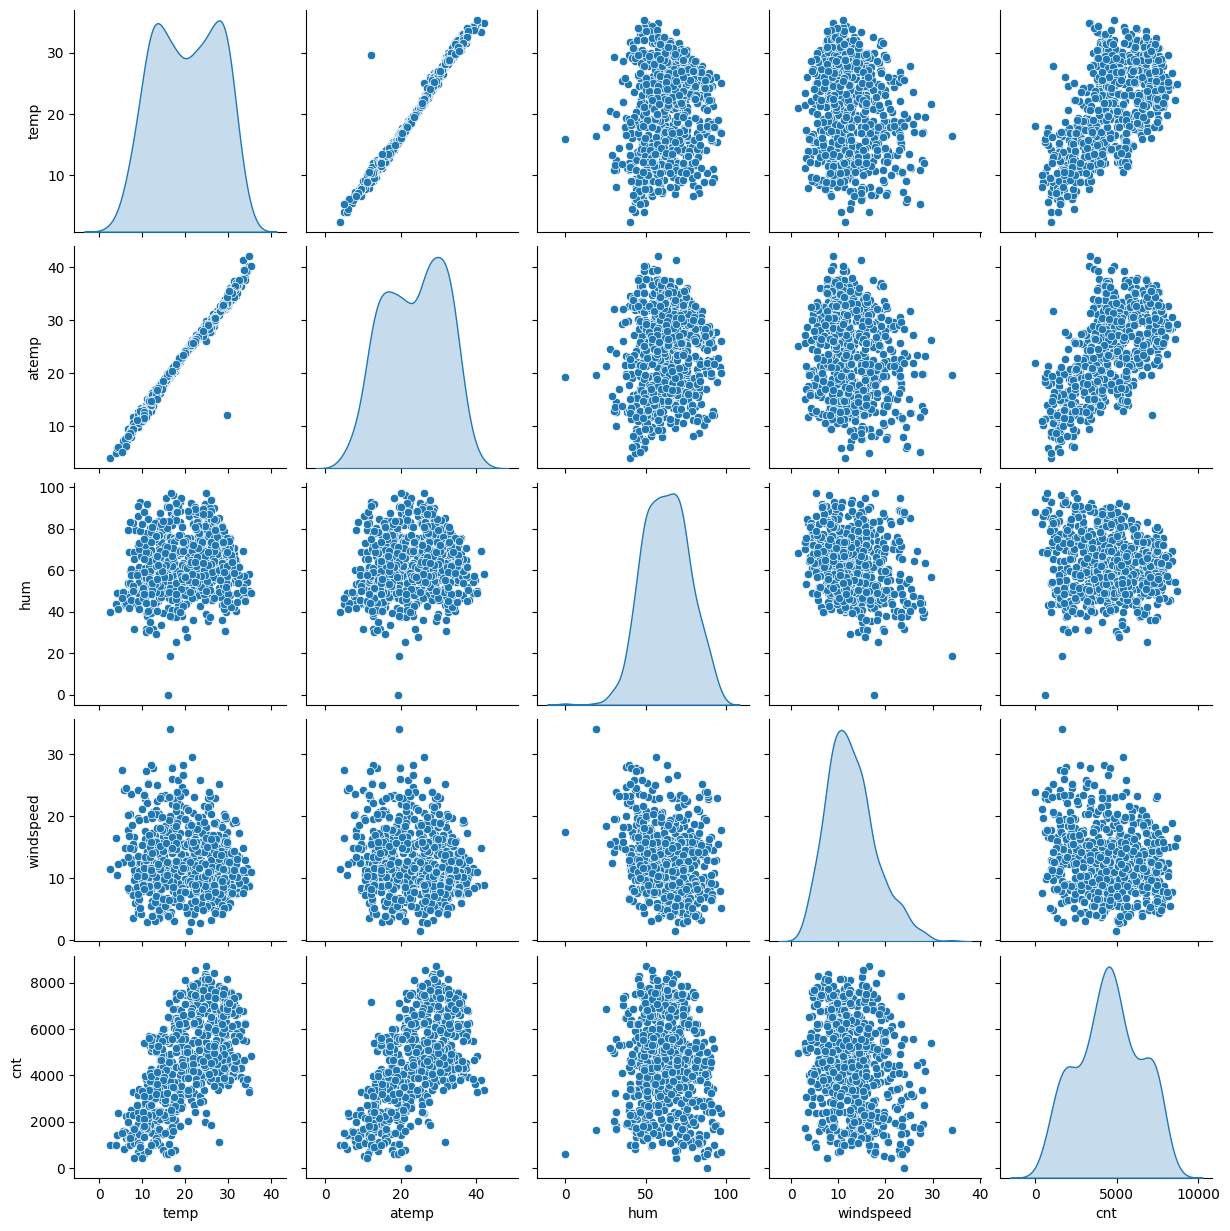

In [10]:
cols = ['temp', 'atemp', 'hum','windspeed','cnt']
bike_sharing_df.head(10)
sns.pairplot(bike_sharing_df[cols],diag_kind='kde')
plt.show()

#### Conclusions from the above data visualisations:

1. There is a strong linear relationship between `cnt` and `temp` , `atemp` as well. Users prefer moderate temp around 20 - 30 deg celsius.
2. Users count data points are more concentrated around 50-100 humidity.
3. Users count data points are more concentrated around 8-20 wind speed.

Overall extreme weather conditions (heavy precip/extreme summers) reduces demand.

#### Visualising Categorical Variables

As we might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

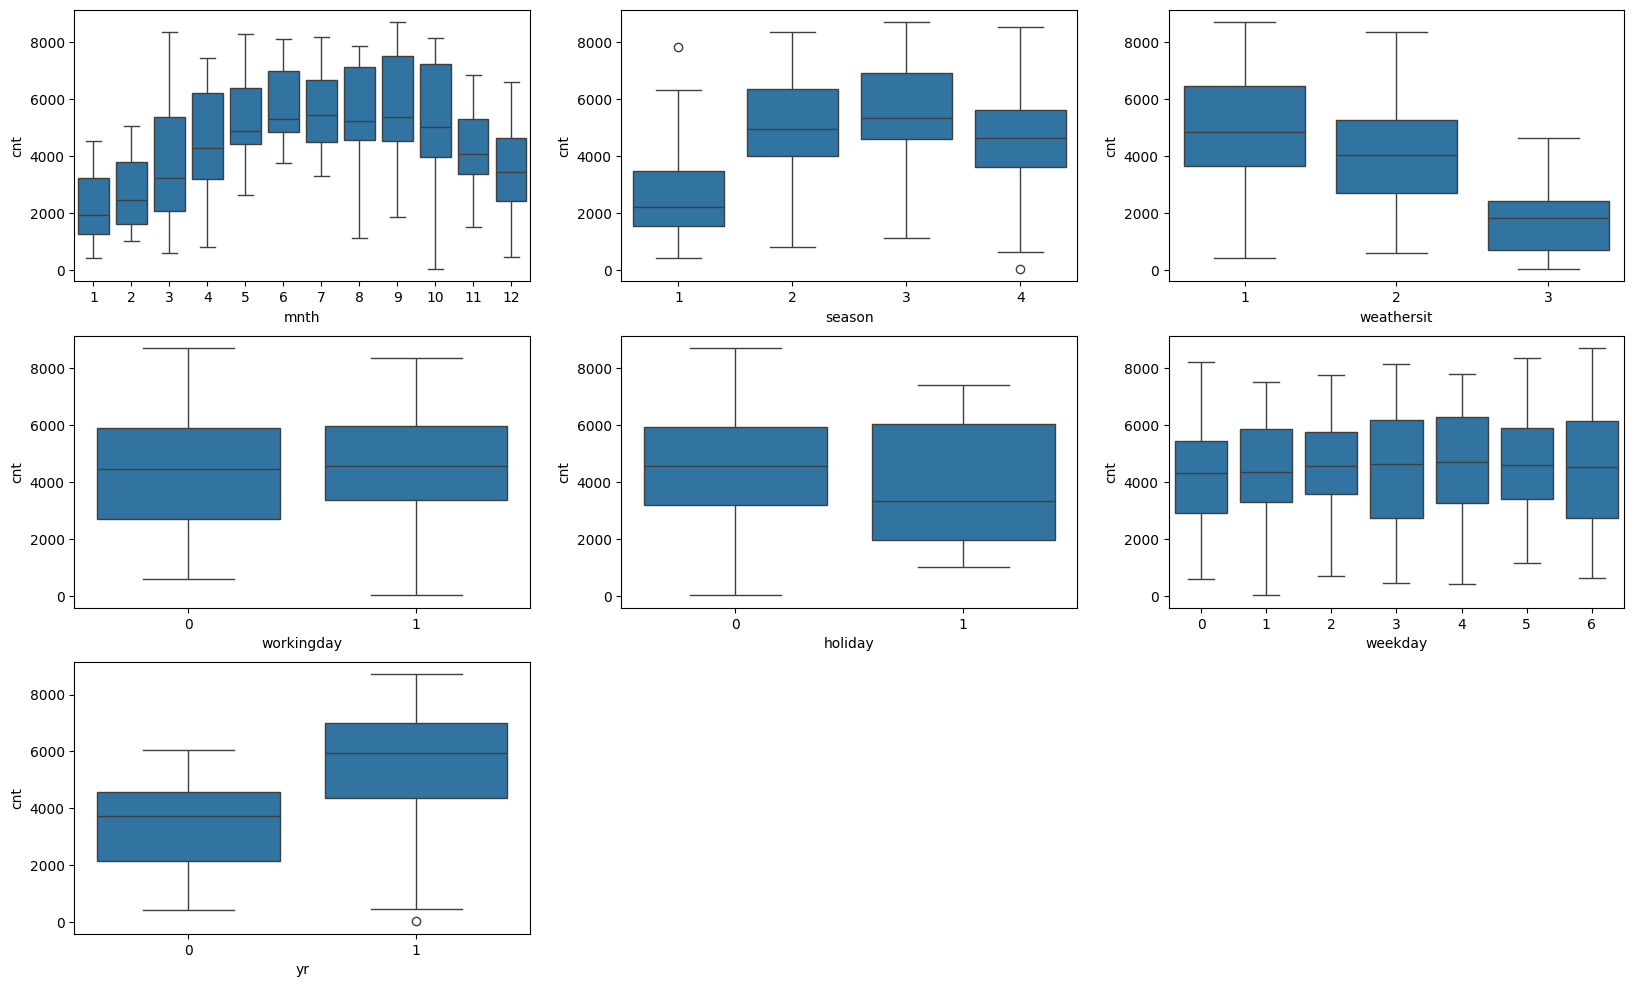

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_df)

plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df)

plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df)

plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_df)

plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df)

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df)

plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_df)
plt.show()

#### Conclusions for the above data visualisations:

1. Bookings significantly increased from 2018 to 2019
2. In particular, more bike bookings observed in the season summer and fall
3. Also the season column analysis plots closely align with mnths column values , strong correlation between `mnths` and `season` column.
4. Users count is more for the following weather: 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds,Mist
These are just observations based on univariate analysis but the  features which are strong predictors will be decided by the final model.


## Step 3: Data Cleanup

Dropping the columns as below:
1. `instant` is just an index
2.  `dteday` is date type which is not numeric and also not categorical type and if we have to identify the pattern then `weekday` .
3.   `cnt` is already a derived variable from `casual` and `registered` and a perfect collinearity example  i.e cnt = casual + registered, which must be avoided.
5.   From the pair plot above we saw `temp` and `atemp` are strongly linear correlated so drop `atemp`.

In [12]:
drop_cols = ['instant', 'dteday', 'casual', 'registered', 'atemp']
bike_sharing_df = bike_sharing_df.drop(columns=drop_cols)

In [13]:
# Check correlation between season and mnth, as season and month mapping are always fixed.
cross_tab_season = pd.crosstab(bike_sharing_df['mnth'], bike_sharing_df['season'], normalize='columns') * 100

print("Cross-tabulation of month vs season (%):")
print(cross_tab_season.round(1))

Cross-tabulation of month vs season (%):
season     1     2     3     4
mnth                          
1       34.4   0.0   0.0   0.0
2       31.1   0.0   0.0   0.0
3       22.2  12.0   0.0   0.0
4        0.0  32.6   0.0   0.0
5        0.0  33.7   0.0   0.0
6        0.0  21.7  10.6   0.0
7        0.0   0.0  33.0   0.0
8        0.0   0.0  33.0   0.0
9        0.0   0.0  23.4   9.0
10       0.0   0.0   0.0  34.8
11       0.0   0.0   0.0  33.7
12      12.2   0.0   0.0  22.5


In [14]:
# Dropping the month column as it is highly correlated with season column, usually seasons 
#    can be derived provided the month value

bike_sharing_df = bike_sharing_df.drop(columns=['mnth'])

## Step 4: Data Preparation

- We can see that the dataset has categorical ( 'yes' or 'no') (`holiday`,`workingday`) columns which are already set to 1 and 0.
- Apart from that there is a `yr` column whose values  0 and 1  are interpretated as  2018 and 2019 respectively.
- We need to map the values present in the columns  `season`, `weathersit` column to respective string values.


### Dummy Variables

#### Mapping the values as per the data dictionary given for the columns season and weathersit

In [15]:
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_map = {
    1: "clear_or_partly_cloudy",
    2: "mist_cloudy",
    3: "light_precip",
    4: "heavy_precip"
}
# Map 0–6 to weekday names
day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}



In [16]:
bike_sharing_df['season'] = bike_sharing_df['season'].map(season_map)

bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'].map(weathersit_map)

bike_sharing_df['weekday'] = bike_sharing_df['weekday'].map(day_map)

In [17]:
bike_sharing_df.head(10)
#bike_sharing_df[bike_sharing_df['holiday']==1].describe()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,0,Sunday,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,0,Monday,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,0,Tuesday,1,clear_or_partly_cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,0,Wednesday,1,clear_or_partly_cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,0,Thursday,1,clear_or_partly_cloudy,9.305237,43.6957,12.522300,1600
5,spring,0,0,Friday,1,clear_or_partly_cloudy,8.378268,51.8261,6.000868,1606
6,spring,0,0,Saturday,1,mist_cloudy,8.057402,49.8696,11.304642,1510
7,spring,0,0,Sunday,0,mist_cloudy,6.765000,53.5833,17.875868,959
8,spring,0,0,Monday,0,clear_or_partly_cloudy,5.671653,43.4167,24.250650,822
9,spring,0,0,Tuesday,1,clear_or_partly_cloudy,6.184153,48.2917,14.958889,1321


The variable `season` has 4 levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [18]:
season = pd.get_dummies(bike_sharing_df['season'], drop_first = True, dtype=int)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [19]:
#The variable  `weathersit` has 3 levels. We need these levels into integer as well. 


weathersit = pd.get_dummies(bike_sharing_df['weathersit'], drop_first = True, dtype=int)
weathersit

,light_precip,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [20]:
weekdays = pd.get_dummies(bike_sharing_df['weekday'], drop_first = True, dtype=int)
weekdays

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


In [21]:
# Add the results to the original bike_sharing_df 

bike_sharing_df = pd.concat([bike_sharing_df, season], axis = 1)
bike_sharing_df = pd.concat([bike_sharing_df, weathersit], axis = 1)
bike_sharing_df = pd.concat([bike_sharing_df, weekdays], axis = 1)


In [22]:
# Drop 'season' and 'weathersit' as we have created the dummies for it

bike_sharing_df.drop(['season'], axis = 1, inplace = True)
bike_sharing_df.drop(['weathersit'], axis = 1, inplace = True)
bike_sharing_df.drop(['weekday'], axis = 1, inplace = True)



In [23]:
bike_sharing_df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,light_precip,mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.028767,0.336986,0.143836,0.142466,0.143836,0.141096,0.143836,0.142466
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.167266,0.473004,0.351164,0.349767,0.351164,0.348359,0.351164,0.349767
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Splitting the Data into Training and Testing Sets

the first basic step for regression is performing a train-test split.

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

 We will use MinMax scaling as it brings all the variables to the same scale i.e. 0 and 1 which helps 
 the model evaluation accurate and computation smooth. if we dont do it , then the coefficients will
 not be correct and interpretation of model will not be right.
 

In [25]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the numeric columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,light_precip,mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,1,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,1,0,0,0


In [29]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,light_precip,mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


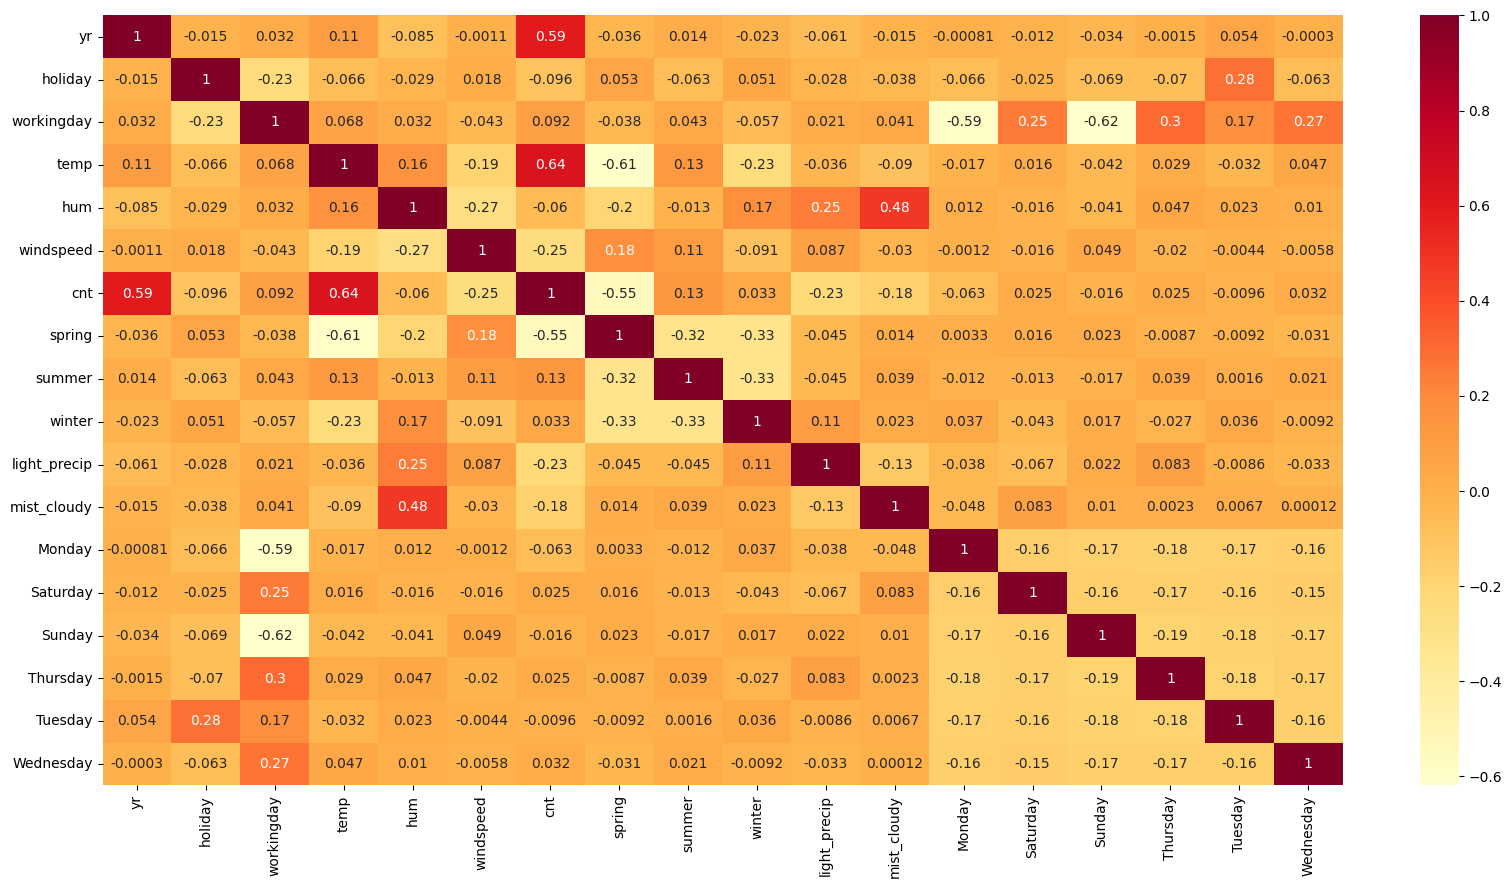

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlOrRd")
plt.show()

As noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `cnt` vs `temp`.

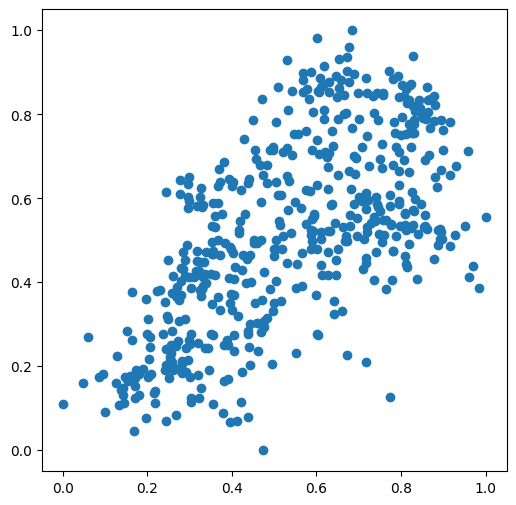

In [31]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [33]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [34]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

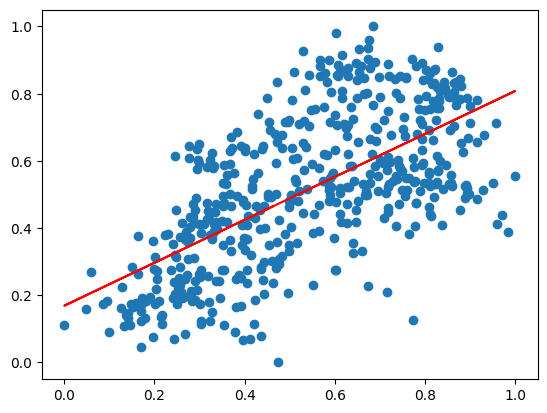

In [35]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169 + 0.639*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [36]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           5.80e-61
Time:                        15:03:57   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable

The R-squared value obtained is `0.414`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [37]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [38]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [39]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          9.25e-130
Time:                        15:03:57   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

##### We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.689` from `0.413`.
Let's go ahead and add another variable, `summer`.

In [40]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','summer']]

In [41]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.076340
temp      0.576795
yr        0.237204
summer    0.028262
dtype: float64

In [42]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     381.0
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          2.33e-129
Time:                        15:03:57   Log-Likelihood:                 339.77
No. Observations:                 510   AIC:                            -671.5
Df Residuals:                     506   BIC:                            -654.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0763      0.015      5.103      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [43]:
# Check all the columns of the dataframe

X_train_lm = X_train[X_train.columns]

In [44]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const           0.208304
yr              0.231707
holiday        -0.001167
workingday      0.083703
temp            0.493259
hum            -0.124334
windspeed      -0.180095
spring         -0.074489
summer          0.042722
winter          0.090119
light_precip   -0.251429
mist_cloudy    -0.058655
Monday          0.034605
Saturday        0.007999
Sunday          0.091163
Thursday        0.005154
Tuesday        -0.013875
Wednesday      -0.010836
dtype: float64

In [45]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     154.9
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          1.76e-180
Time:                        15:03:57   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     493   BIC:                            -887.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2083      0.029      7.232   

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,52.66
13,Sunday,11.94
11,Monday,11.55
6,spring,4.55
3,temp,3.51
8,winter,3.11
1,holiday,3.06
7,summer,2.07
4,hum,1.89
15,Tuesday,1.88


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has a very high p-value of `0.961`. Let's go ahead and drop this variables

In [48]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('holiday', axis=1)

In [49]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     154.9
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          1.76e-180
Time:                        15:03:57   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     493   BIC:                            -887.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2071      0.045      4.591   

In [51]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.10
1,workingday,19.47
2,temp,18.36
12,Sunday,5.50
10,Monday,5.33
4,windspeed,4.95
5,spring,4.55
7,winter,3.43
6,summer,2.47
9,mist_cloudy,2.32


### Dropping the Variable and Updating the Model

As  noticed,there are still variables with high P values like `Thursday` , `Saturday` , `Wednesday`,`Monday` and `Tuesday` which are not significant
Let us drop them.

In [52]:
# Dropping highly correlated variables and insignificant variables
X = X.drop(['Thursday','Saturday','Wednesday','Monday','Tuesday'], axis=1,errors='ignore')

In [53]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          5.24e-185
Time:                        15:03:57   Log-Likelihood:                 493.64
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     498   BIC:                            -912.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2369      0.037      6.466   

In [55]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.40
2,temp,15.63
1,workingday,4.71
4,windspeed,4.69
5,spring,3.86
7,winter,3.10
6,summer,2.28
9,mist_cloudy,2.28
0,yr,2.08
10,Sunday,1.83


### Dropping the variable and updating the model

Now dropping `hum` and `workingday` as it has  the VIF. We cannot drop `temp` as it was most correlated feature with cnt as per heatmap plotted earlier.

In [56]:
X = X.drop(['hum','workingday'], axis=1,errors='ignore')

In [57]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.7
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          4.44e-180
Time:                        15:03:57   Log-Likelihood:                 476.28
No. Observations:                 510   AIC:                            -932.6
Df Residuals:                     500   BIC:                            -890.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2156      0.030      7.146   

We can also drop `Sunday` as it still has p value slightly greater than .05

In [59]:
X = X.drop(['Sunday'], axis=1,errors='ignore')

In [60]:
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [61]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          1.51e-180
Time:                        15:03:57   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     501   BIC:                            -892.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2195      0.030      7.273   

In [62]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.55
0,yr,2.07
3,spring,1.94
4,summer,1.79
5,winter,1.60
7,mist_cloudy,1.52
6,light_precip,1.08


Now we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [63]:
y_train_cnt = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

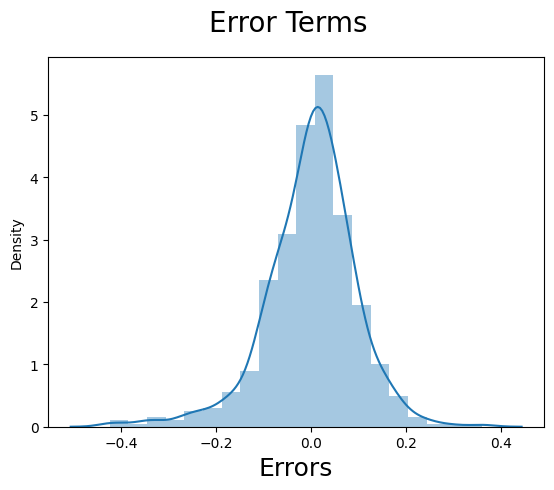

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                       # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [65]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [66]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,light_precip,mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [67]:
y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [69]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['Thursday','Saturday','Wednesday','Monday','Tuesday','hum','workingday','holiday','Sunday'], axis = 1)

In [70]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

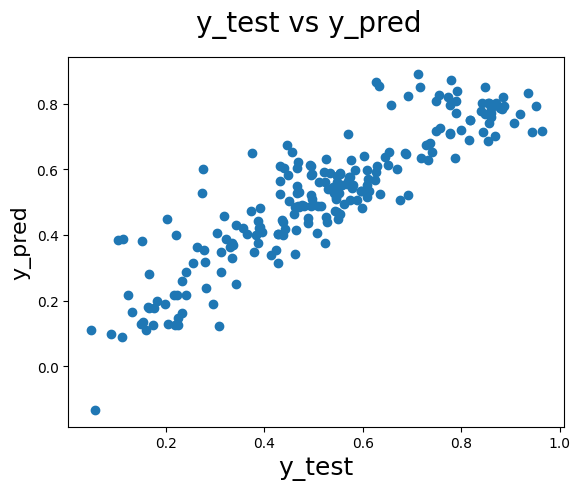

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [72]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          1.51e-180
Time:                        15:03:57   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     501   BIC:                            -892.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2195      0.030      7.273   

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7967360957694913

We can see that the equation of our best fitted line is:

$ cnt = 0.469  \times  temp + 0.234  \times  yr + 0.074 \times winter + 0.038 \times summer 
- 0.16 \times windspeed - 0.083 \times spring - 0.275 \times light\_precip - 0.0629 \times mist\_cloudy + .219$ 